## Project Overview
This project aims to predict the presence of Chronic Kidney Disease (CKD) using various clinical and demographic features. CKD is a condition characterized by a gradual loss of kidney function over time and can lead to serious health problems if not detected early. The dataset includes various parameters such as blood pressure, serum creatinine, hemoglobin levels, and more.

## Import Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Load the Dataset
The dataset used in this project consists of clinical records from patients, with a mix of numerical and categorical features indicating different medical conditions and test results. The goal is to utilize this data to predict whether a patient has CKD or not.


In [76]:
df = pd.read_csv('/Users/parthkhurana/Desktop/Projects/Kidney_Disease/kidney_disease.csv')
df.head(30)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


Rewriting the column names for the dataset and dropping the ID column

In [77]:
# removing id column
df = df.drop(['id'], axis=1)

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'classification']

## Basic Information about the Dataset

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

## Dataset Overview

The dataset consists of 400 entries, each representing a patient's clinical record for Chronic Kidney Disease (CKD) prediction. There are a total of 25 columns in the dataset, encompassing both numerical and categorical data types, which include clinical parameters and health indicators relevant to the diagnosis of CKD.

### Columns Description

- **Numerical Features**:
  - `age`: Age of the patient (in years).
  - `blood_pressure`: Blood pressure (in mmHg).
  - `specific_gravity`: Specific gravity of urine.
  - `albumin`: Albumin levels (in g/dL).
  - `sugar`: Sugar levels.
  - `blood_glucose_random`: Random blood glucose level (in mg/dL).
  - `blood_urea`: Blood urea level (in mg/dL).
  - `serum_creatinine`: Serum creatinine level (in mg/dL).
  - `sodium`: Sodium level (in mEq/L).
  - `potassium`: Potassium level (in mEq/L).
  - `haemoglobin`: Haemoglobin level (in g/dL).

- **Categorical Features**:
  - `red_blood_cells`, `pus_cell`, `pus_cell_clumps`, `bacteria`: Indicators of infections or abnormalities in the urine.
  - `hypertension`, `diabetes_mellitus`, `coronary_artery_disease`, `appetite`, `pedal_edema`, `aanemia`: Presence of conditions and symptoms associated with CKD.
  - `packed_cell_volume`, `white_blood_cell_count`, `red_blood_cell_count`: Blood cell counts and volumes, potentially indicative of CKD.
  - `classification`: The target variable, indicating the presence or absence of CKD.



## Target Variable

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64


<Axes: xlabel='classification', ylabel='Count'>

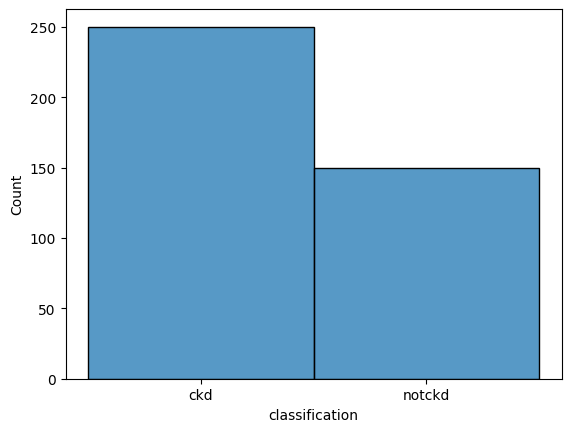

In [79]:
print(df['classification'].value_counts())

# replacing ckd\t to ckd
df['classification'] = df['classification'].replace('ckd\t', 'ckd')

sns.histplot(df['classification'])

Removing duplicate values

In [80]:
# removing duplicates
df = df.drop_duplicates()

## Missing Values

In [81]:
print(df.isnull().sum().sort_values(ascending=False))

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64


<Axes: >

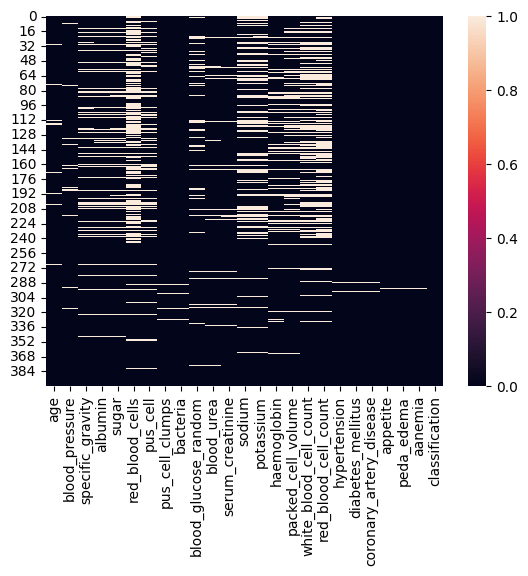

In [82]:
sns.heatmap(df.isnull())

### Missing Values Analysis

The heatmap visualization and missing value counts provide a detailed view of the data's completeness. Each row in the heatmap represents an entry in the dataset, and each column corresponds to a feature. The color coding ranges from dark (complete data) to light (missing data), highlighting the patterns of missingness across different variables.

### Missing Values Insight

From the provided missing value counts, we observe that:

- The `red_blood_cells` feature has the highest number of missing values (152), followed by `red_blood_cell_count` (130) and `white_blood_cell_count` (105). 
- Electrolytes like `potassium` and `sodium` are also missing in a significant number of cases (88 and 87, respectively).
- `packed_cell_volume`, `pus_cell`, and `haemoglobin` also show a considerable amount of missing data, which are crucial for anemia and kidney function analysis.
- Other features such as `age`, `blood_pressure`, `bacteria`, and `pus_cell_clumps` have relatively few missing values.
- The target variable, `classification`, has no missing values, which is essential for supervised learning.


## Encoding

Converting categorical (non-numeric) columns into numerical columns for machine learning task

In [83]:
from sklearn.preprocessing import LabelEncoder
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=LabelEncoder().fit_transform(df[i])

## Imputing Missing Values

Using the KNNImputer from scikit-learn to impute missing values in the dataset using the k-Nearest Neighbors approach with 5 neighbors. The imputed data is then converted back into a pandas DataFrame, and we check for any remaining null values.

In [84]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
df_i = imp.fit_transform(df)  # imputed data
df_i = pd.DataFrame(df_i, columns=df.columns)
df_i.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
classification             0
dtype: int64

In [85]:
df_i.head(30)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
0,48.0,80.0,1.020,1.0,0.0,2.0,1.0,0.0,0.0,121.0,...,32.0,72.0,34.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,2.0,1.0,0.0,0.0,163.4,...,26.0,56.0,49.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,19.0,70.0,49.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,20.0,62.0,19.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,23.0,68.0,27.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
5,60.0,90.0,1.015,3.0,0.0,2.0,2.0,0.0,0.0,74.0,...,27.0,72.0,25.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0
6,68.0,70.0,1.010,0.0,0.0,2.0,1.0,0.0,0.0,100.0,...,24.0,92.0,49.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
7,24.0,66.0,1.015,2.0,4.0,1.0,0.0,0.0,0.0,410.0,...,32.0,64.0,31.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0
8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,138.0,...,21.0,88.0,21.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0
9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,70.0,...,17.0,18.0,17.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0


## Correlation Heatmap

<Axes: >

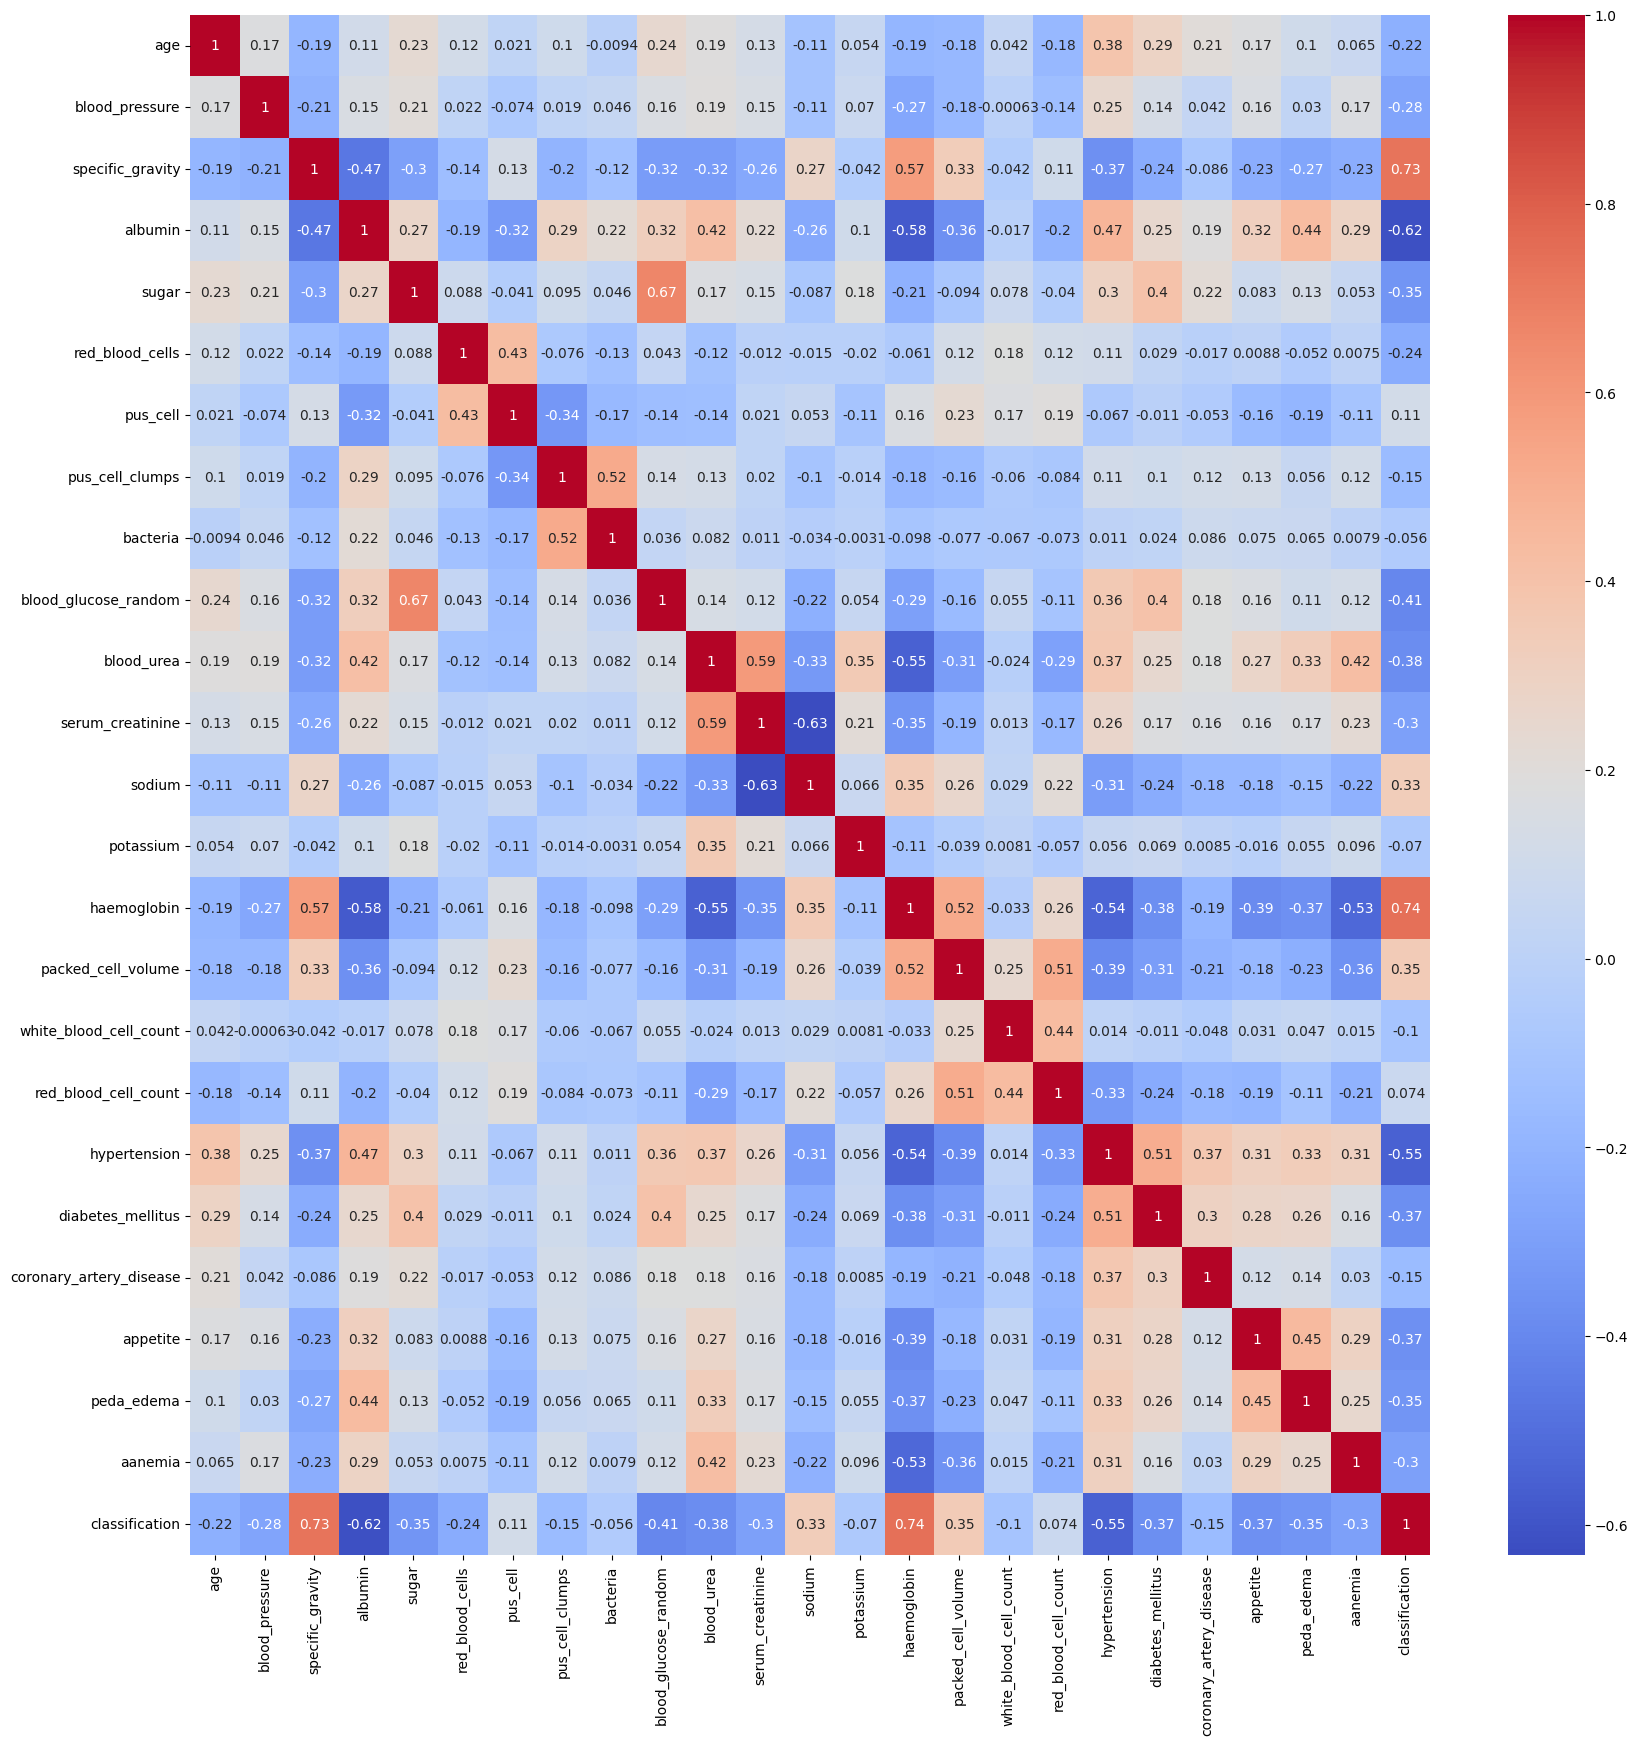

In [92]:
plt.figure(figsize=(20,20))
sns.heatmap(df_i.corr(),annot=True,cmap='coolwarm')

The heatmap visualizes the correlation matrix of our dataset, highlighting the strength and direction of relationships between variables. Dark red and blue squares indicate strong positive and negative correlations, respectively, with the intensity of the color corresponding to the magnitude of the correlation coefficient. This visualization is instrumental in pinpointing key features that have strong linear associations with the target variable 'classification', such as 'specific_gravity', 'serum_creatinine', and 'albumin'. It also aids in detecting multicollinearity between predictors, as seen in the high correlation between 'haemoglobin' and 'packed_cell_volume', which could affect model performance if not addressed. Features with low correlations, appearing closer to white, suggest unique information that could enhance model predictions. Overall, this heatmap is a critical step in our data exploration, guiding feature selection and preliminary model considerations.

## Normalization

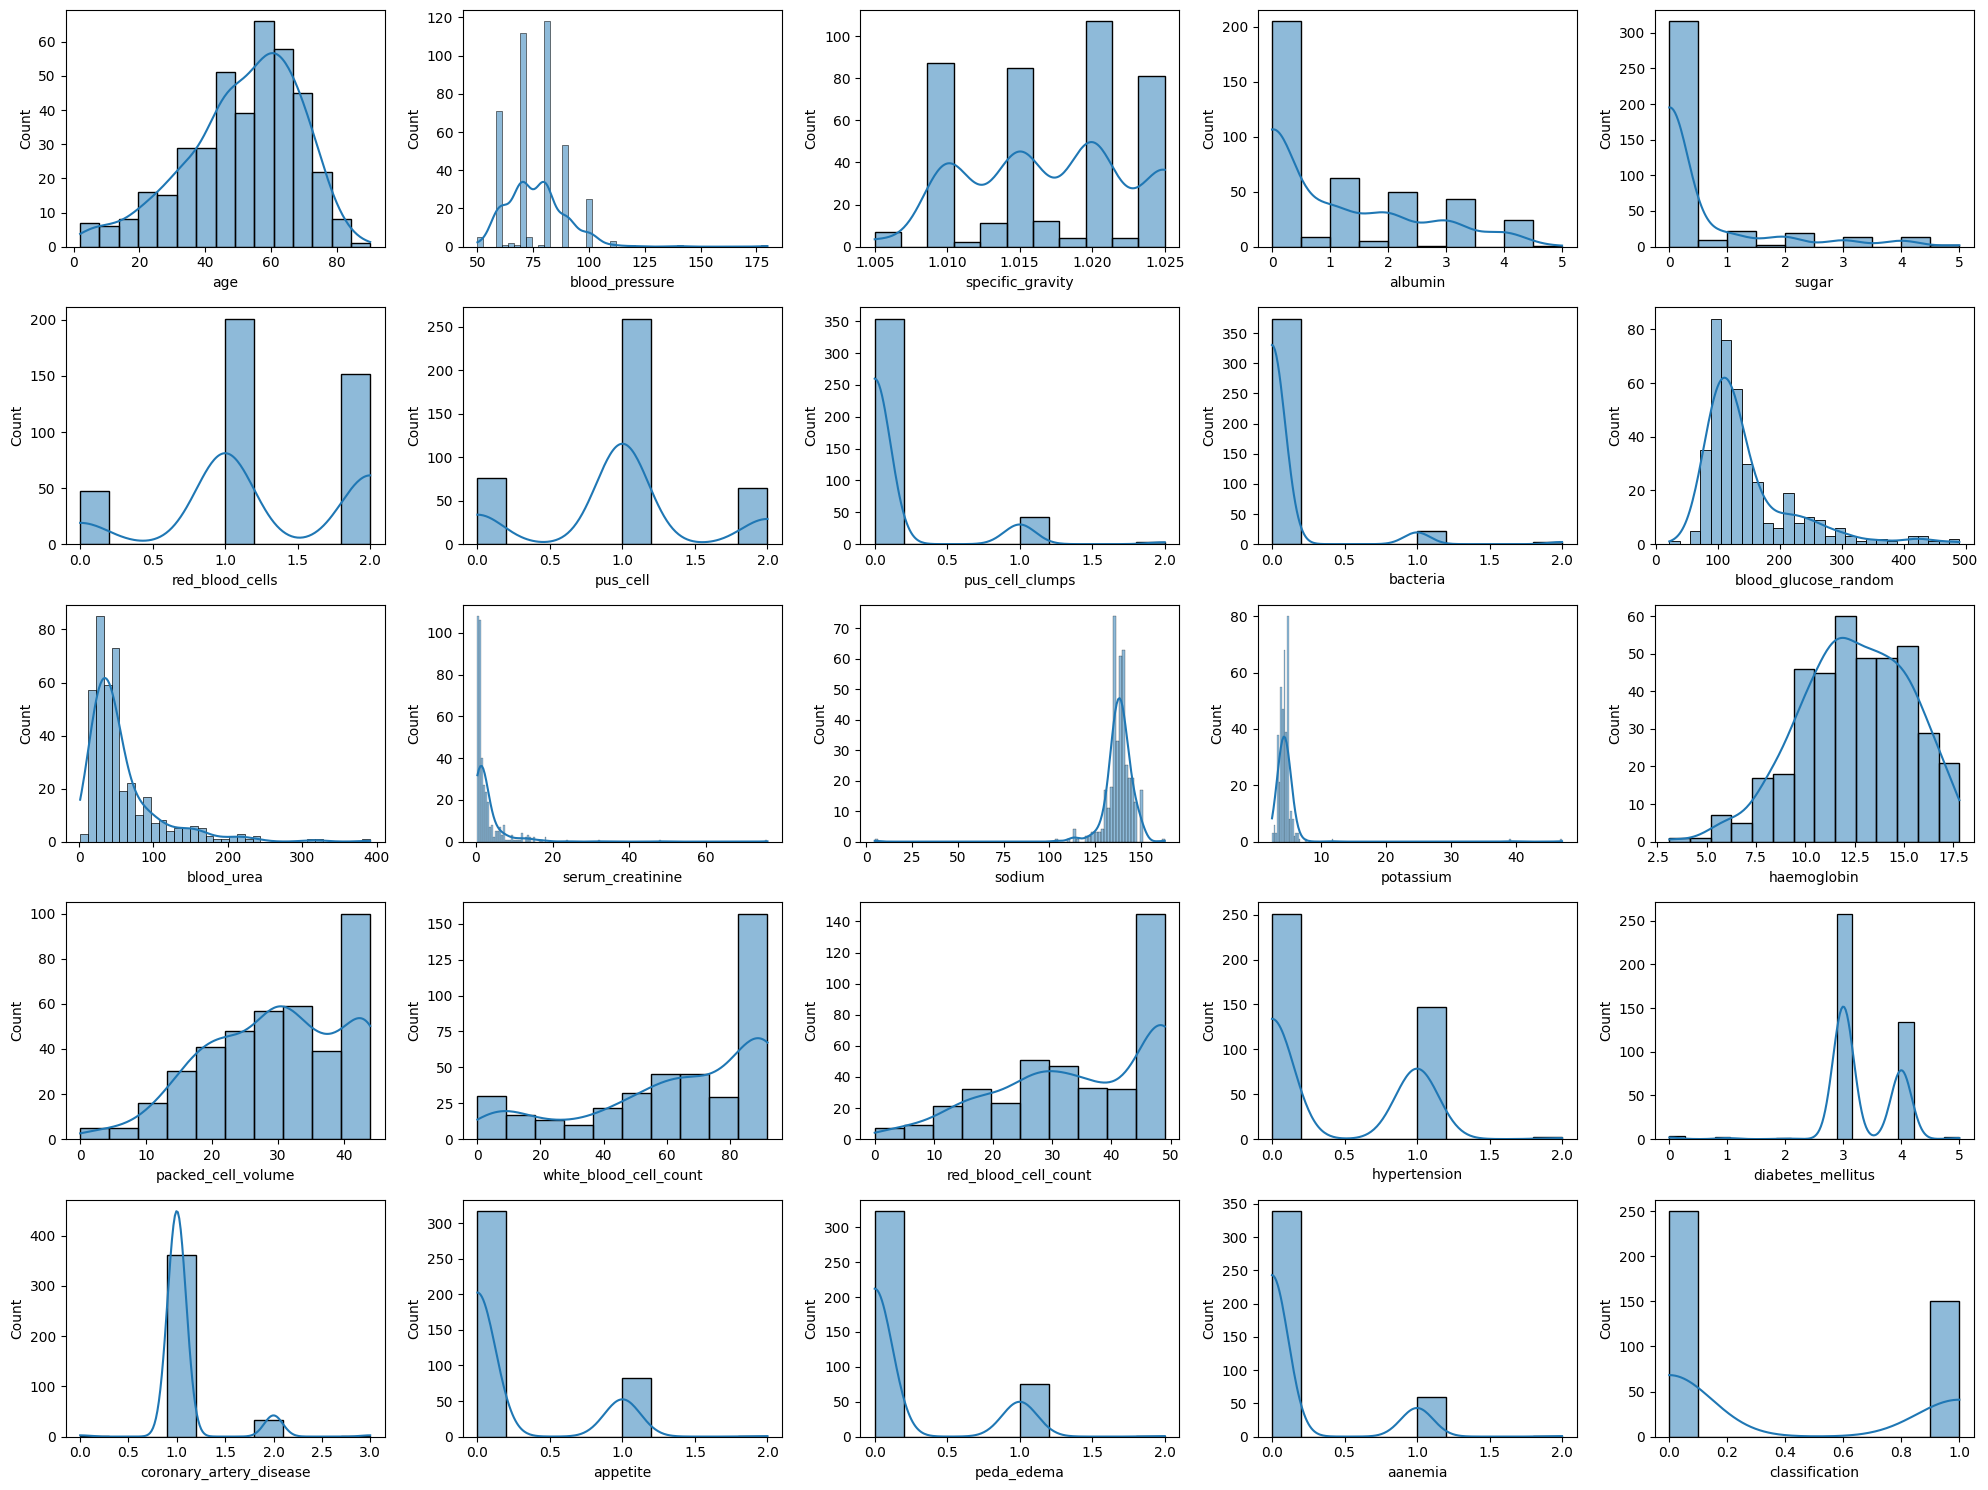

In [97]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df_i[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Separating X and Y

In [99]:
Y = df_i['classification']
X = df_i.drop(['classification'], axis=1)

### Scaling the columns

In [98]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

## Train-Test Split

Splitting the dataset into training and testing subsets, ensuring that each class's proportion in `Y` is maintained within both subsets using stratified sampling, with 30% of data allocated for testing.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,stratify=Y,test_size=0.3)

In [88]:
y_train.value_counts()

classification
0.0    175
1.0    105
Name: count, dtype: int64

## Support Vector Machine (SVM)

Initializing and training a Support Vector Machine (SVM) classifier with a radial basis function (RBF) kernel and evaluating its performance using a classification report and visualizing the confusion matrix.


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        75
         1.0       0.98      0.93      0.95        45

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



<Axes: >

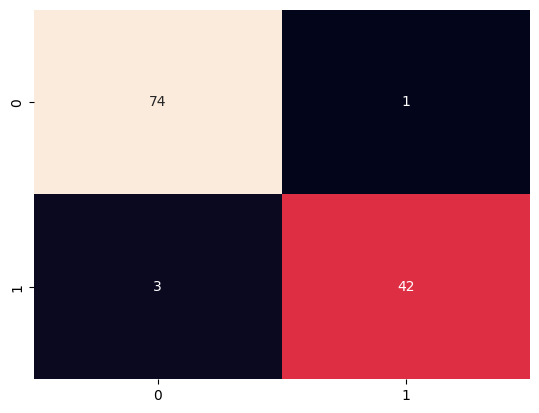

In [100]:
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error
from sklearn.svm import SVC

# Create an SVM classifier with chosen parameters
svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state= 123)

# Train the SVM classifier
svm_clf.fit(x_train, y_train)
y_pred_svm = svm_clf.predict(x_test)

print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='g', cbar=False)

The Support Vector Machine (SVM) model has been trained to classify instances as either having chronic kidney disease (CKD) or not having it (NoCKD). For the NoCKD class (labeled as '0'), the precision is 96%, indicating that among all the predictions made by the model for NoCKD, 96% were correct. The recall for the NoCKD class is 99%, which means that the model successfully identified 99% of the actual NoCKD cases. For the CKD class (labeled as '1'), the precision is 98%, signifying that 98% of the predictions made for CKD were accurate. The recall for CKD is 93%, showing that the model identified 93% of the actual CKD cases.

The f1-score, which balances precision and recall, is 97% for NoCKD and 95% for CKD, suggesting strong model performance for both classes. The overall accuracy of the model stands at 97%, meaning that it made the correct prediction for 97% of the test set. The support values indicate that there were 75 cases of NoCKD and 45 cases of CKD in the test set.

The confusion matrix further illustrates the model's performance, with only 1 NoCKD case misclassified as CKD and 3 CKD cases misclassified as NoCKD. The high values of macro and weighted averages across precision, recall, and f1-score (97%) indicate that the model's performance is consistent and reliable in identifying both conditions.


## Random Forest Classifier

The given Python code uses the RandomForestClassifier from the sklearn.ensemble module to train a model on the `x_train` and `y_train` datasets. The model is then used to predict the outcomes for the `x_test` dataset. The performance of the model is evaluated using a classification report and a confusion matrix, which is visualized using a heatmap.

The RandomForestClassifier is a supervised learning algorithm that creates an ensemble of decision trees, usually trained with the bagging method. The general idea of the bagging method is that a combination of learning models increases the overall result.

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        75
         1.0       1.00      0.98      0.99        45

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<Axes: >

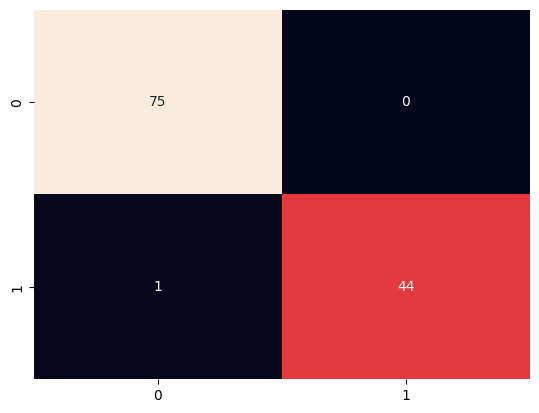

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state= 123)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

print(classification_report(y_test,y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf,)
sns.heatmap(cm_rf, annot=True, fmt='g', cbar=False)

The RandomForestClassifier model's predictions for Chronic Kidney Disease (CKD) identification are highly accurate, as indicated by the confusion matrix and classification report. The model accurately predicted 'noCKD' for 75 out of 75 cases (100% recall) and correctly identified 'CKD' for 44 out of 45 instances (98% recall). The precision for both 'noCKD' and 'CKD' was perfect at 99% and 100%, respectively, which means that almost all positive predictions were correct.

The overall accuracy of the model stood at an impressive 99%, showcasing the model's ability to differentiate between 'noCKD' and 'CKD' cases effectively. Only one 'CKD' case was misclassified as 'noCKD', which is reflected in the near-perfect f1-scores of 0.99 for both classes, indicating a well-balanced precision and recall. This model demonstrates robust performance in the diagnosis of CKD.

## XGBoost Classifier

The provided Python code uses the XGBClassifier from the xgboost module to train a model on the `x_train` and `y_train` datasets. The model is then used to predict the outcomes for the `x_test` dataset. The performance of the model is evaluated using a classification report and a confusion matrix, which is visualized using a heatmap.

The XGBClassifier is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library.

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        75
         1.0       1.00      0.98      0.99        45

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



<Axes: >

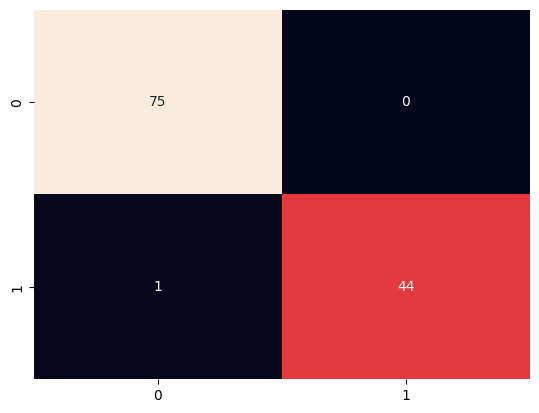

In [129]:
#!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)

print(classification_report(y_test,y_pred_xg))
cm_xg = confusion_matrix(y_test, y_pred_xg,)
sns.heatmap(cm_xg, annot=True, fmt='g', cbar=False)

The classification report shows that the model has an accuracy of 0.99, indicating that it correctly predicted the class (CKD or NoCKD) for 99% of the cases in the test set. The precision, recall, and f1-score for both classes (0.0 and 1.0) are also close to 1, suggesting that the model performs well in identifying both classes.

The confusion matrix, visualized as a heatmap, provides a more detailed view of the model's performance. The matrix shows the number of true positive, true negative, false positive, and false negative predictions made by the model. In this case, the heatmap indicates that the model has a high number of true positives and true negatives, and a low number of false positives and false negatives, further confirming the model's high accuracy.

## Comparing Model Performance

Using accuracy, precision and F-1 score to compare the three different models: SVM, Random Forest and XG Boost

In [133]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')  
f1_svm = f1_score(y_test, y_pred_svm, average='binary')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')  
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

accuracy_xg = accuracy_score(y_test, y_pred_xg)
precision_xg = precision_score(y_test, y_pred_xg, average='binary')  
f1_xg = f1_score(y_test, y_pred_xg, average='binary')

models_accuracy = pd.DataFrame({
    'Model' : ['SVM', 'Random Forest Classifier', 'XgBoost'],
    'Accuracy' : [accuracy_svm, accuracy_rf, accuracy_xg]
})

models_precision = pd.DataFrame({
    'Model' : ['SVM', 'Random Forest Classifier', 'XgBoost'],
    'Precision' : [precision_svm, precision_rf, precision_xg]
})

models_f1 = pd.DataFrame({
    'Model' : ['SVM', 'Random Forest Classifier', 'XgBoost'],
    'F1-score' : [f1_svm, f1_rf, f1_xg]
})

print(models_accuracy.sort_values(by = 'Accuracy', ascending = False))
print(f'\n')
print(models_precision.sort_values(by = 'Precision', ascending = False))
print(f'\n')
print(models_f1.sort_values(by = 'F1-score', ascending = False))

                      Model  Accuracy
1  Random Forest Classifier  0.991667
2                   XgBoost  0.991667
0                       SVM  0.966667


                      Model  Precision
1  Random Forest Classifier   1.000000
2                   XgBoost   1.000000
0                       SVM   0.976744


                      Model  F1-score
1  Random Forest Classifier  0.988764
2                   XgBoost  0.988764
0                       SVM  0.954545


### Visualization of Results

/var/folders/pp/z15j_rhn22z16k937sk24y340000gn/T/ipykernel_30668/1215217316.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y=metrics[i], data=data[i], palette=palette)
/var/folders/pp/z15j_rhn22z16k937sk24y340000gn/T/ipykernel_30668/1215217316.py:12: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.barplot(x='Model', y=metrics[i], data=data[i], palette=palette)
/var/folders/pp/z15j_rhn22z16k937sk24y340000gn/T/ipykernel_30668/1215217316.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y=metrics[i], data=data[i], palette=palette)
/var/folders/pp/z15j_rhn22z16k937sk24y340000gn/T/ipykernel_30668/1

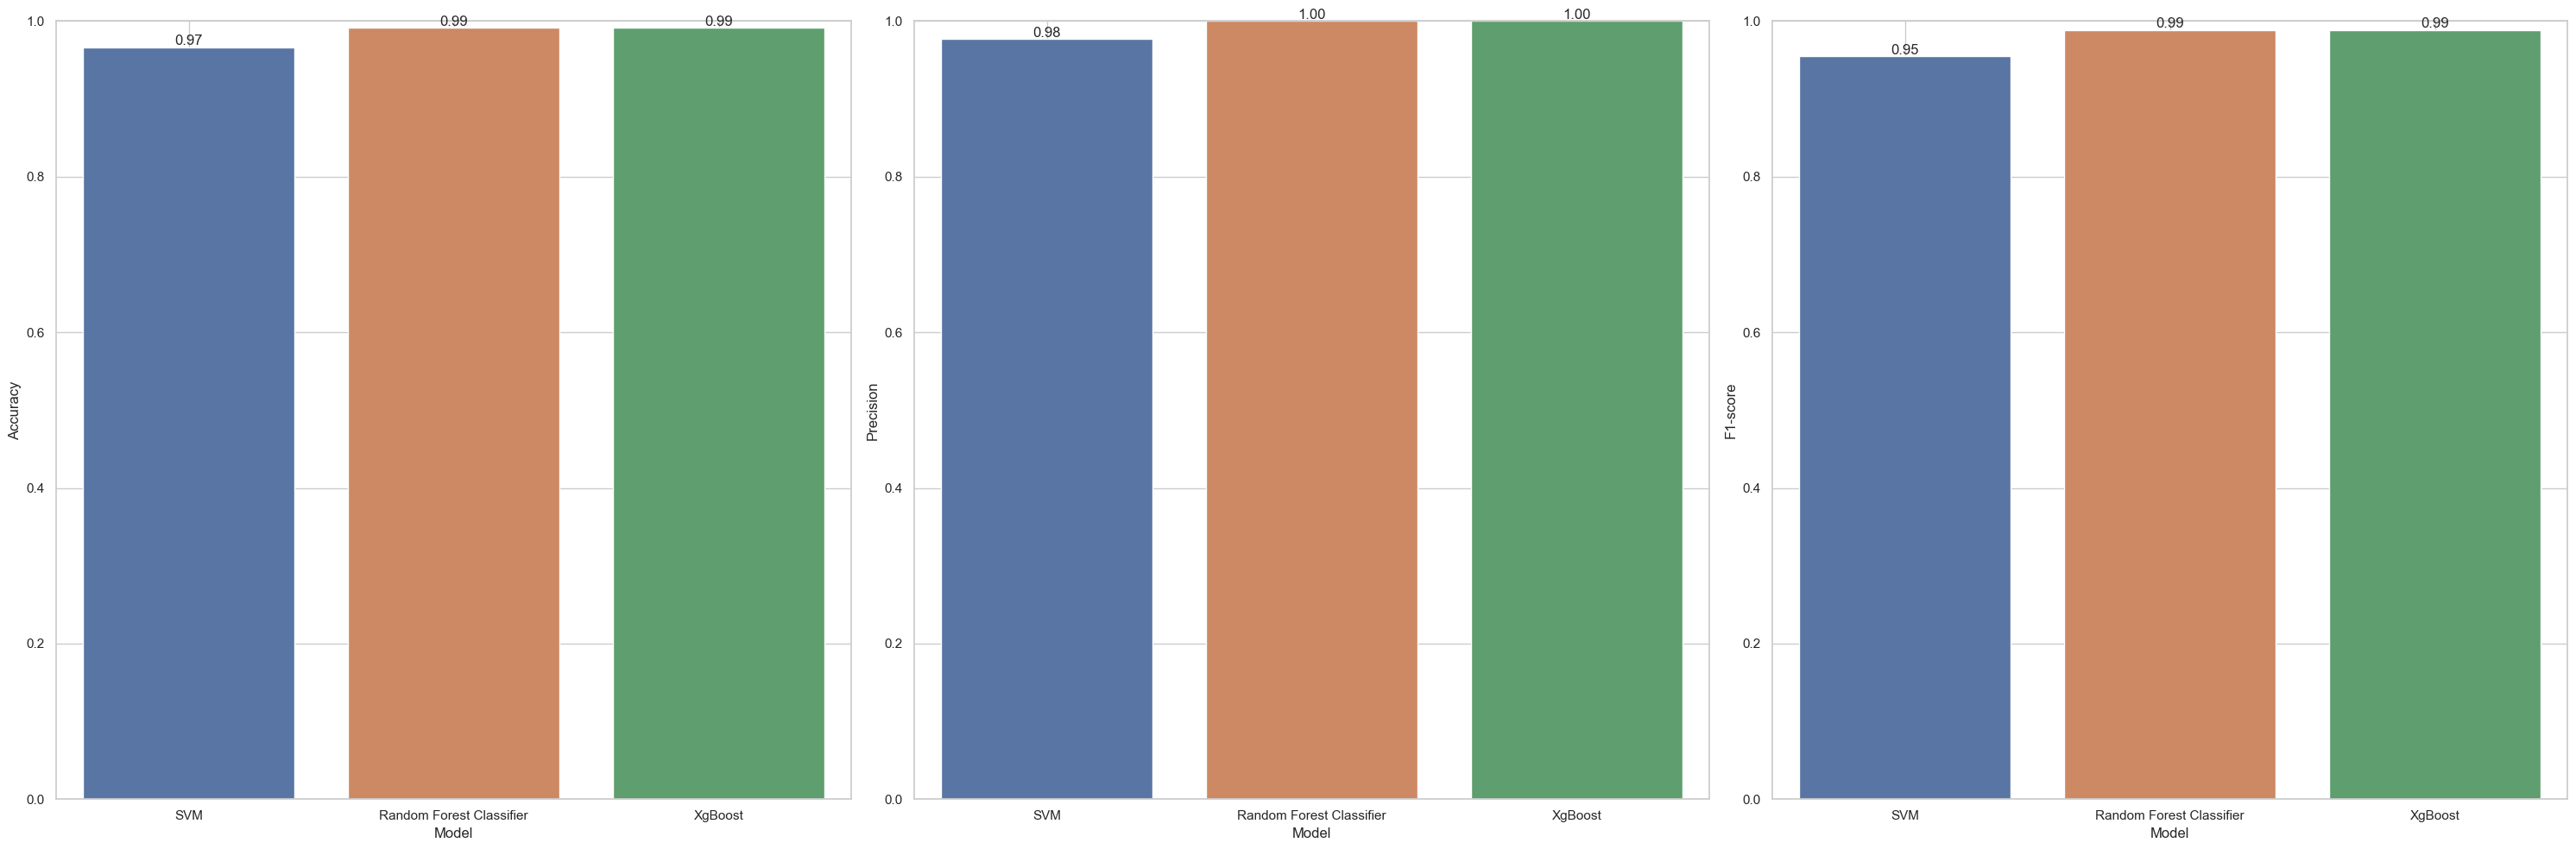

In [147]:
# Set the color palette and figure size
palette = sns.color_palette("deep", 5)
plt.figure(figsize=(30, 10))

# List of metrics for iteration
metrics = ['Accuracy', 'Precision', 'F1-score']
data = [models_accuracy, models_precision, models_f1]

# Iterate over each metric
for i in range(3):
    plt.subplot(1, 3, i+1)
    ax = sns.barplot(x='Model', y=metrics[i], data=data[i], palette=palette)
    plt.ylim(0, 1)  # Assuming metric values are between 0 and 1
    plt.grid(True)  # Add gridlines for easier value estimation

    # Add labels on each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points'
                    )

plt.tight_layout()
plt.show()


### Conclusion

The comparison of three distinct machine learning models — Support Vector Machine (SVM), Random Forest Classifier, and XGBoost — reveals their performance across three key metrics: accuracy, precision, and F1-score.

- `Accuracy`: This metric measures the overall correctness of the model. The Random Forest Classifier outperforms with an accuracy of 0.99, closely followed by XGBoost at the same level. SVM lags slightly behind with an accuracy of 0.97. This suggests that both Random Forest and XGBoost are highly reliable for making correct predictions on the given dataset.

- `Precision`: Precision evaluates the model's ability to classify positive results correctly. Here, both Random Forest and XGBoost achieve perfect precision at 1.00, indicating no false positives within the test data. SVM shows a marginally lower precision of 0.98, which is still commendable.

- `F1-Score`: The F1-score is a balanced measure that combines precision and recall. All models showcase impressive F1-scores with both Random Forest and XGBoost at 0.99, and SVM at 0.95. This denotes a strong balance between precision and recall for all models, with Random Forest and XGBoost having a slight edge.

In conclusion, while all three models demonstrate robust performance, the Random Forest Classifier and XGBoost have an edge over SVM in all the evaluated metrics. The choice between Random Forest and XGBoost may come down to other factors such as the training time, interpretability, and computational resources, as their performance metrics are quite similar. For scenarios where the highest precision is critical and the occurrence of false positives is less tolerable, Random Forest and XGBoost would be preferable. However, SVM should not be discounted, especially when computational efficiency and model simplicity are desired, given its slightly lower but still high metrics.